In [122]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'

In [12]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [21]:
data = pd.read_html(url)
data

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [30]:
table = data[0]

In [32]:
table.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [37]:
table["terrestrial_date"] = pd.to_datetime(table["terrestrial_date"])

In [38]:
table.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [41]:
#Number of months on mars in data
mars_months = table["month"].nunique()
mars_months

12

In [46]:
months_table = table.groupby("month")["month"].count()

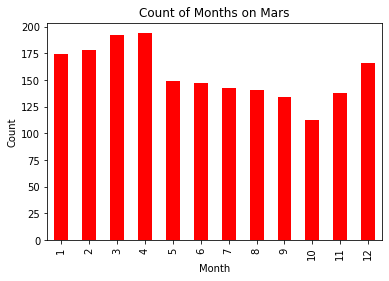

In [50]:
months_bar_plot = months_table.plot.bar(color="red")
plt.title("Count of Months on Mars")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

In [51]:
min_temp = table.groupby("month")["min_temp"].mean()

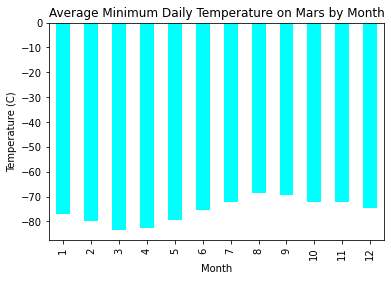

In [60]:
avg_min_temp_bar_plot = min_temp.plot.bar(color="cyan")
plt.title("Average Minimum Daily Temperature on Mars by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (C)")
plt.show()

In [65]:
atmospheric_pressure = table.groupby("month")["pressure"].mean()

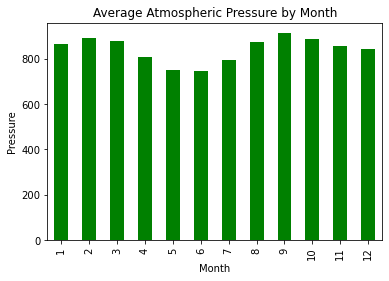

In [66]:
pressure_bar_plot = atmospheric_pressure.plot.bar(color="green")
plt.title("Average Atmospheric Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.show()

In [144]:
earth_2015_year = table[table["terrestrial_date"].dt.year == 2015]

In [145]:
mars_2015 = earth_2015_year.groupby("month")["min_temp"].mean()

In [146]:
earth_2015_year["Earth Month"] = earth_2015_year["terrestrial_date"].dt.month
earth_2015_year

,id,terrestrial_date,sol,ls,month,min_temp,pressure,Earth Month
775,799,2015-01-01,855,263,9,-69.0,912.0,1
776,795,2015-01-02,856,264,9,-68.0,912.0,1
777,801,2015-01-03,857,264,9,-76.0,911.0,1
778,800,2015-01-04,858,265,9,-73.0,913.0,1
779,802,2015-01-05,859,266,9,-72.0,915.0,1
...,...,...,...,...,...,...,...,...
1110,1134,2015-12-27,1205,86,3,-86.0,861.0,12
1111,1137,2015-12-28,1206,87,3,-85.0,859.0,12
1112,1138,2015-12-29,1207,87,3,-85.0,858.0,12
1113,1139,2015-12-30,1208,88,3,-85.0,857.0,12


In [147]:
earth_2015 = earth_2015_year.groupby("Earth Month")["min_temp"].mean()

In [148]:
earth_2015

Earth Month
1    -71.545455
2    -71.740741
3    -72.793103
4    -72.692308
5    -74.413793
6    -76.250000
7    -77.100000
8    -78.200000
9    -79.433333
10   -80.800000
11   -84.172414
12   -85.500000
Name: min_temp, dtype: float64

In [149]:
mars_2015

month
1    -77.147541
2    -79.707692
3    -84.546875
9    -70.900000
10   -71.925000
11   -72.760870
12   -74.925926
Name: min_temp, dtype: float64

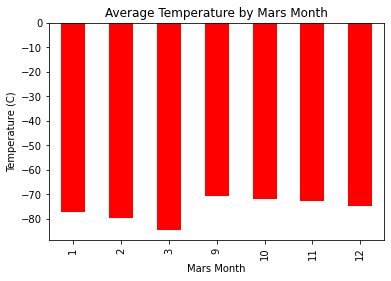

In [155]:
mars_2015_bar = mars_2015.plot.bar(color="red")
plt.title("Average Temperature by Mars Month")
plt.xlabel("Mars Month")
plt.ylabel("Temperature (C)")

plt.show()

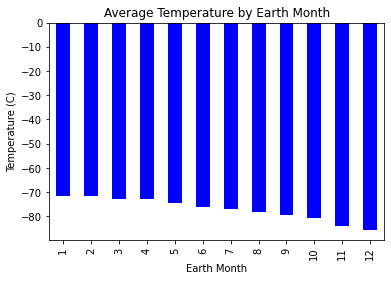

In [156]:
earth_2015_bar = earth_2015.plot.bar(color="blue")
plt.title("Average Temperature by Earth Month")
plt.xlabel("Earth Month")
plt.ylabel("Temperature (C)")
plt.show()

In [ ]:
#Over the duration of 1 Earth year, only 7 months on Mars pass. This means it takes approximately twice as long for Mars to 
# revolve around the sun in Earth days. ie ~700 Earth days for mars to rotate the sun.

In [159]:
#Export Mars data to csv
table.to_csv("Mars_data.csv")